This file is dedicated to this brainteaser:

*"Three people choose numbers from 1 to 100. The first person chooses randomly, following a uniform distribution, while the second and third choose their numbers rationally. The person who chooses the highest number has to pay the other two the amount they chose. You are the second person—what number do you choose? Keep in mind that you won’t know which numbers the others have chosen before making your decision."*

First, let's suppose we are in a setting with only oneself and the uniformly distributed person, in this setting, our return would look like this;

f(x) = (100-X)X - X((X-1)/2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.linspace(1, 100, num = 100,)

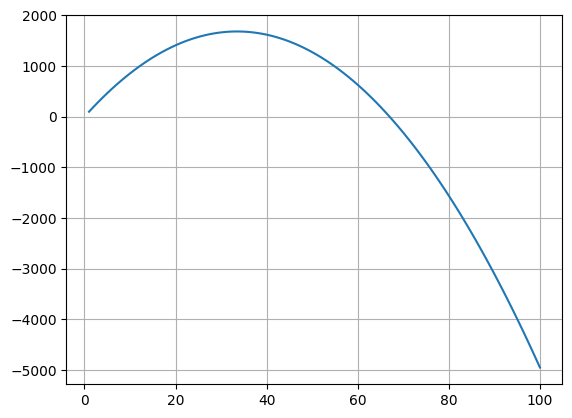

In [2]:
f = x*(100-x)-x*((x-1)/2)
plt.figure(0)
plt.plot(x,f)
plt.grid()

In [8]:
df = pd.DataFrame([x,f])
df = df.transpose()
df.columns = ['X','F(x)']

filt = df['F(x)'] == df['F(x)'].max()
df[filt]

,X,F(x)
32,33.0,1683.0
33,34.0,1683.0


As we see, in this setting we would choose the value 32 or 33 independently. Now we have to account for the third person, a rational choosing person. This person would know that we would choose 32 or 33, so they would choose the number that maximises their return base on this information. This number will be lower than our number, because then, the third person will never have to pay, and will be as close as our number as is possible, to not lose any potential return.

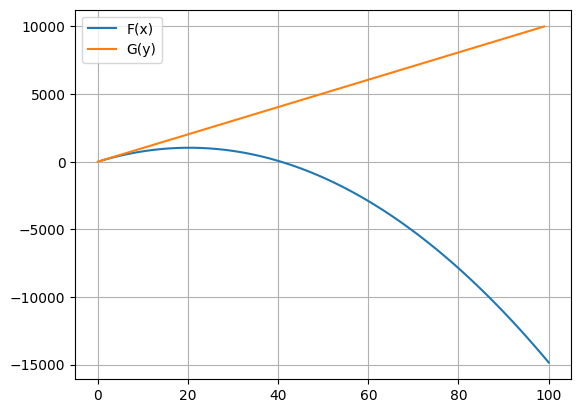

In [34]:
y = x - 1
g = y*(100-y)+y*x

plt.figure(1)
plt.plot(x,f,g)
plt.grid()
plt.legend(['F(x)','G(y)'])

As here is proved, the best number is the one right below our number (orange line), but we did not take into account the payment for the third person when measuring our return, and we have to.

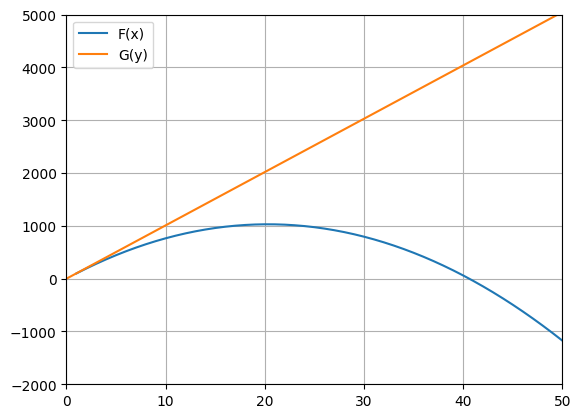

In [35]:
f = x*(100-x)-x*((x-1)/2)-(y*x)
plt.figure(3)
plt.plot(x,f,g)
plt.grid()
plt.xlim(0,50)
plt.ylim(-2000,5000)
plt.legend(['F(x)','G(y)'])

We have zoomed and corrected the previous functions, we see, that for a setting in which the third person will choose the number inmmediately lower than ours, our best choice is the number 20, making y be 19.

In [16]:
df_1 = pd.DataFrame([x,y,f,g]).transpose()
df_1.columns = ['X','Y','F(x)','G(y)']
filt_1 = df_1['F(x)'] == df_1['F(x)'].max()
df_1[filt_1]

,X,Y,F(x),G(y)
19,20.0,19.0,1030.0,1919.0


Now, as we know the third person will choose 19, we could choose 18, being now us the orange line and getting a better return, but then again, they could think of that and choose 17, and so on till number 5 or 6 respectively, because it's then when the orange line stops getting a better return than the blue line.

In [31]:
pd.set_option('display.max_rows', 20)
df_1.head(15)

,X,Y,F(x),G(y)
0,1.0,0.0,99.0,0.0
1,2.0,1.0,193.0,101.0
2,3.0,2.0,282.0,202.0
3,4.0,3.0,366.0,303.0
4,5.0,4.0,445.0,404.0
5,6.0,5.0,519.0,505.0
6,7.0,6.0,588.0,606.0
7,8.0,7.0,652.0,707.0
8,9.0,8.0,711.0,808.0
9,10.0,9.0,765.0,909.0


Now, as both number 5 and 6 in both the blue and orange line give a worse return than number 20 in blue line, you are better off choosing the number 20 and going with it, if you try to lowball it you are trying to avoid risk, not accounting it, and will get worse returns. We could try to perfectionate this solution, but only estimating the aversion to risk of the third person, higher aversion means lower number and lower aversion higher number, we could create a curve of probability with this data, and then another expected value function accounting the new probability, but we don't have that data.